In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from collections import Counter

pd.set_option('display.max_rows', None)

from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
df=pd.read_csv('통합.csv',encoding='cp949')
df2=pd.read_csv('부산시장_최종.csv')

In [48]:
df=df.drop(['행정동코드', '시도명', '시군구명', '읍면동명', '시장명', '위도', '경도'], axis=1)

In [ ]:
df.head()

,주차장수,버스정류장수,점포수,편의시설수,PC검색량,Mobile검색량,블로그콘텐츠,카페콘텐츠,age_under_10_유동,age_20_30_유동,...,age_above_60_체류,daily_life_체류,leisure_life_체류,weekday_체류,holiday_체류,age_under_10_주민등록,age_20_30_주민등록,age_40_50_주민등록,age_above_60_주민등록,영업률
0,12,7,225,18,10,10,122,133,121840,337374,...,3558507,8748267,3955890,7440545,5263612,837,1856,2852,5094,0.850
1,32,16,556,10,800,9150,771,837,565,1865,...,1321843,2386887,823073,1912344,1297616,106,286,703,1289,0.722
2,14,17,594,20,560,7230,442,469,93067,31539,...,1409525,5959524,1218467,3952391,3225600,1481,4371,4082,3379,0.684
3,10,15,276,22,310,2490,98,91,200715,424037,...,2435803,7127367,2794284,5666038,4255613,424,846,1209,1662,0.929
4,2,15,285,19,760,3650,2300,2280,549598,93725,...,4102156,10753285,7829957,9734359,8848883,588,2505,2840,3610,0.821


In [ ]:
df.columns

Index(['주차장수', '버스정류장수', '점포수', '편의시설수', 'PC검색량', 'Mobile검색량', '블로그콘텐츠',
       '카페콘텐츠', 'age_under_10_유동', 'age_20_30_유동', 'age_40_50_유동',
       'age_above_60_유동', 'daily_life_유동', 'leisure_life_유동', 'weekday_유동',
       'holiday_유동', 'age_under_10_체류', 'age_20_30_체류', 'age_40_50_체류',
       'age_above_60_체류', 'daily_life_체류', 'leisure_life_체류', 'weekday_체류',
       'holiday_체류', 'age_under_10_주민등록', 'age_20_30_주민등록', 'age_40_50_주민등록',
       'age_above_60_주민등록', '영업률'],
      dtype='object')

In [ ]:
new_columns=['car', 'bus', 'shop', 'convenient', 'PC', 'Mobile', 'Blog_contents', 'Cafe_contents',
             'age_under_10_move', 'age_20_30_move', 'age_40_50_move', 'age_above_60_move',
             'daily_life_move', 'leisure_life_move', 'weekday_move', 'holiday_move',
             'age_under_10_stay', 'age_20_30_stay', 'age_40_50_stay', 'age_above_60_stay',
             'daily_life_stay', 'leisure_life_stay', 'weekday_stay', 'holiday_stay',
             'age_under_10_resident', 'age_20_30_resident', 'age_40_50_resident', 'age_above_60_resident',
             'target']
df.columns = new_columns

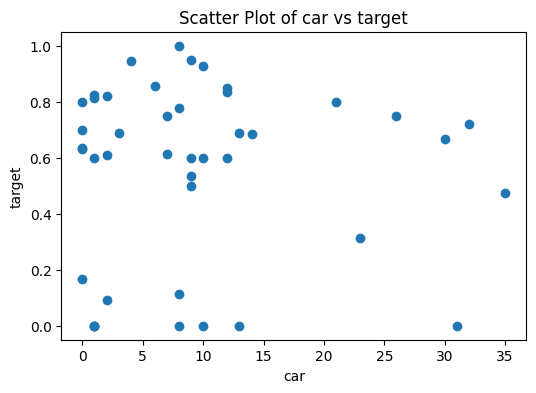

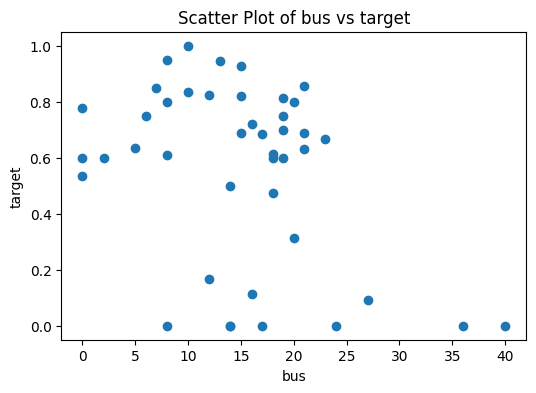

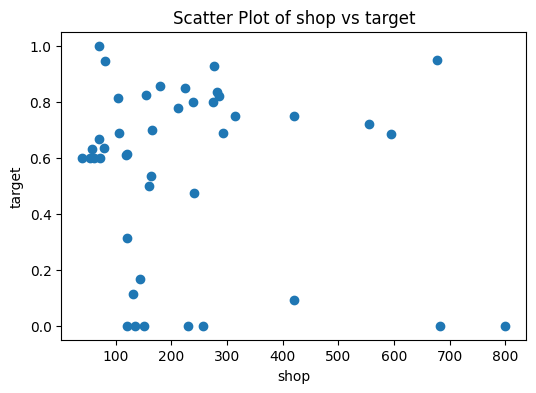

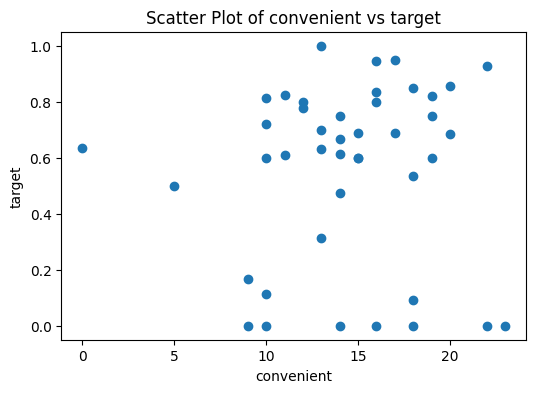

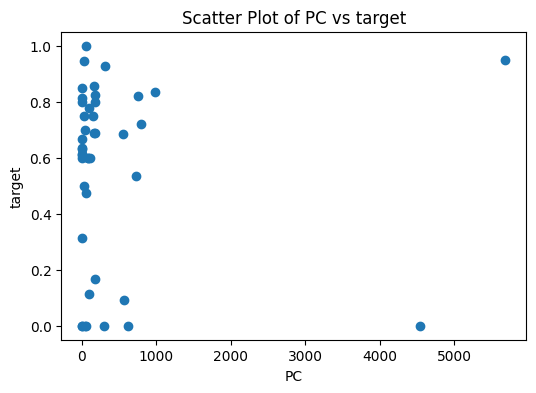

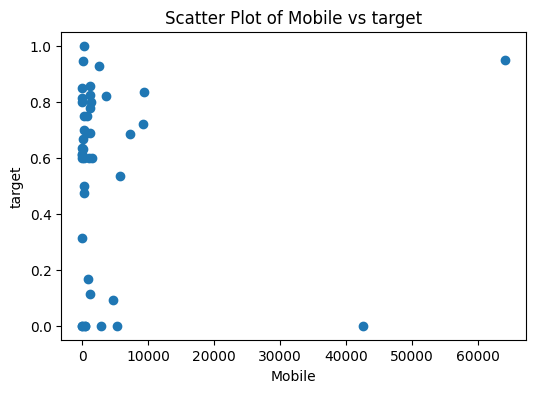

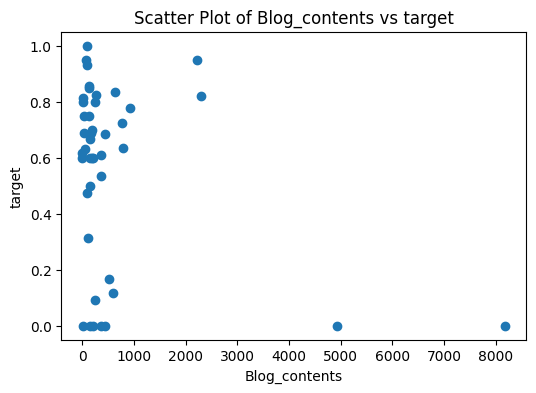

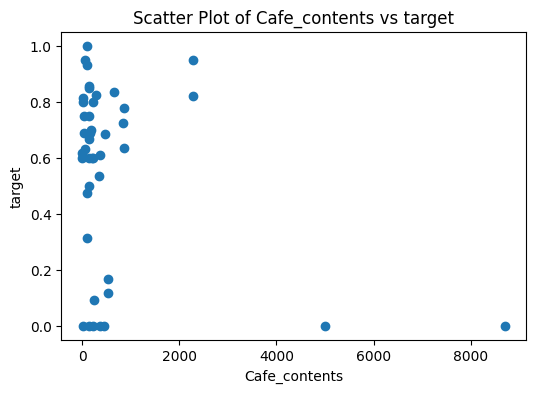

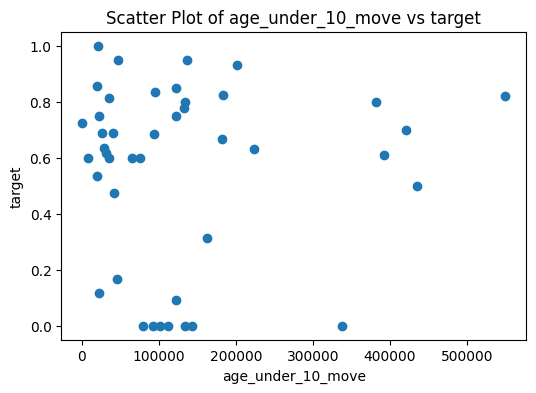

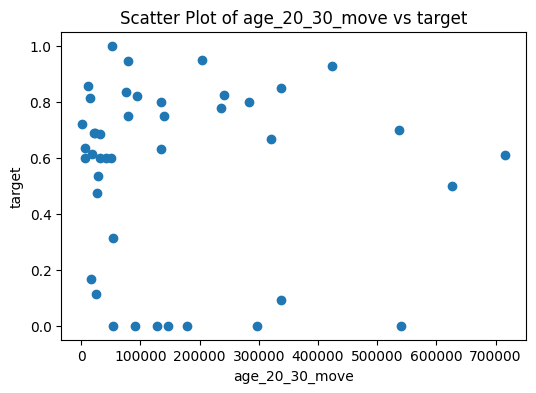

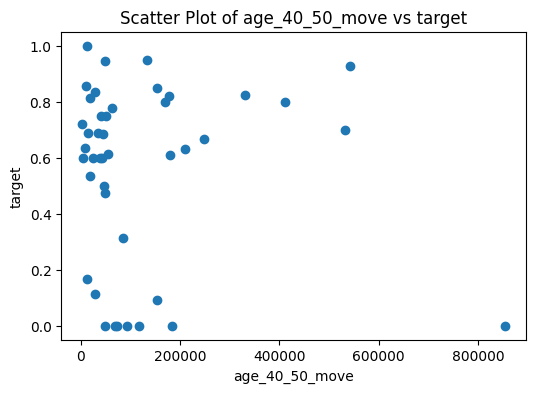

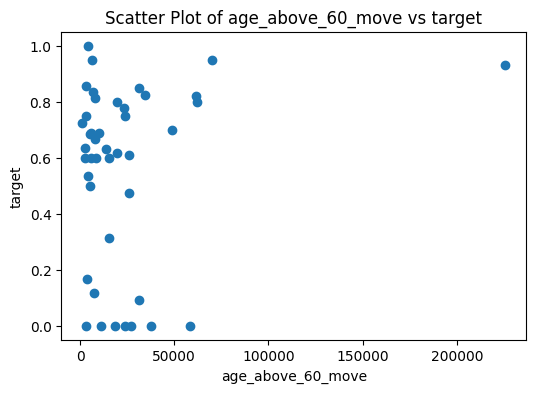

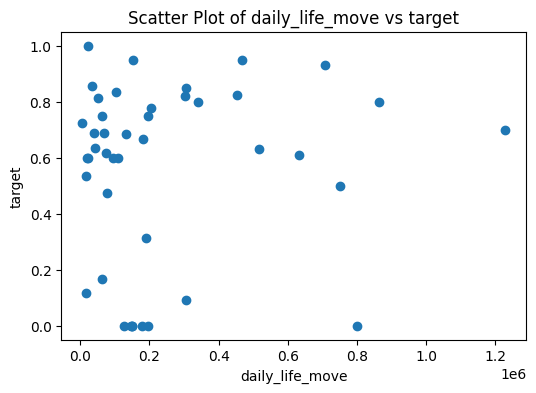

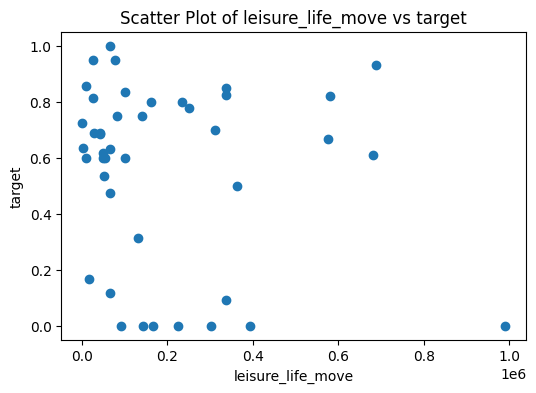

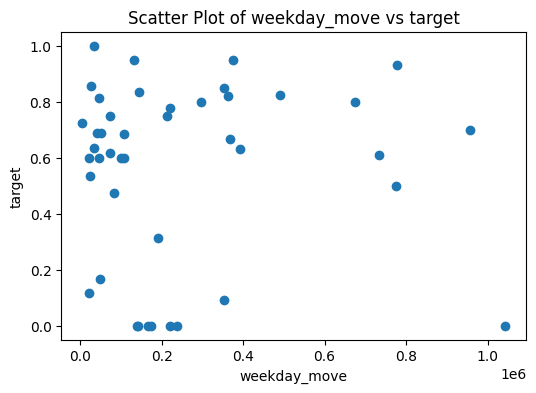

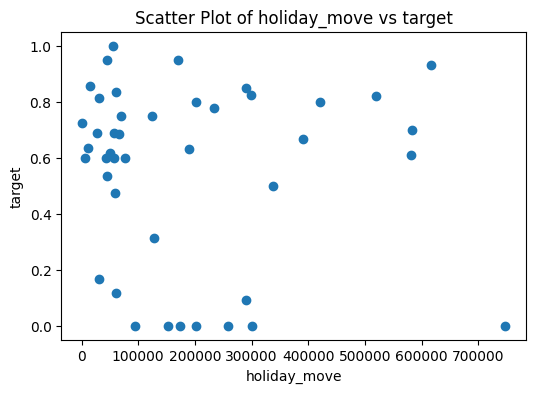

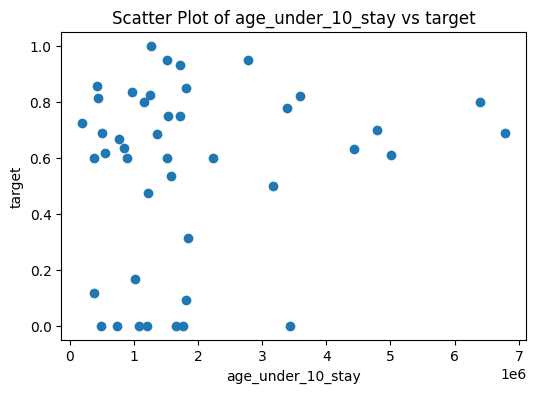

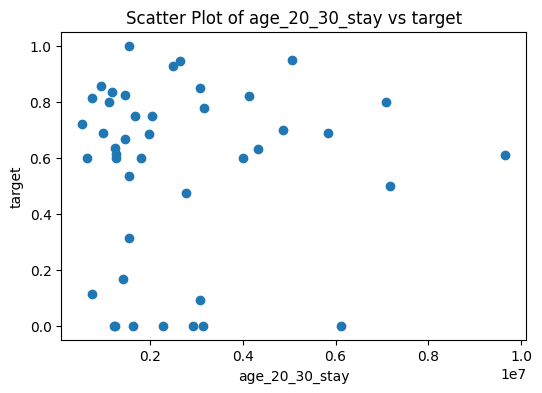

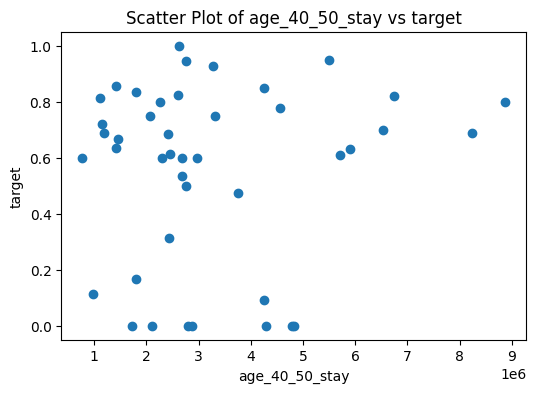

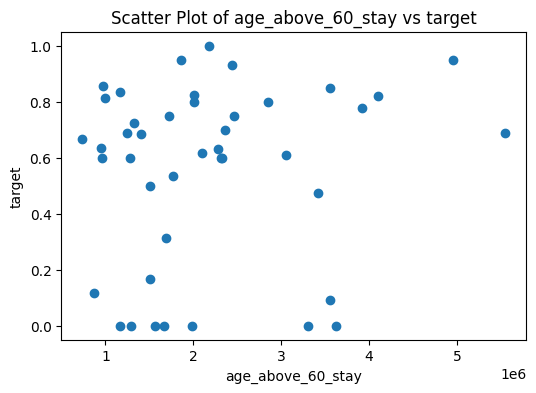

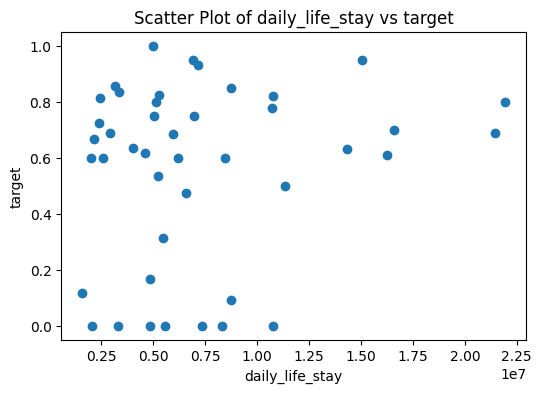

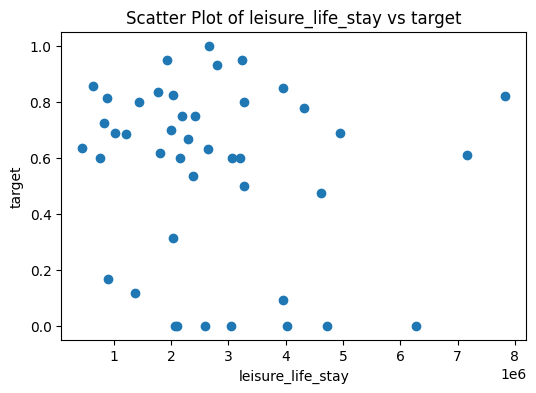

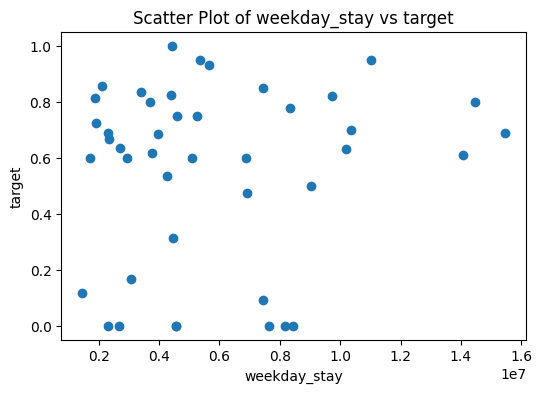

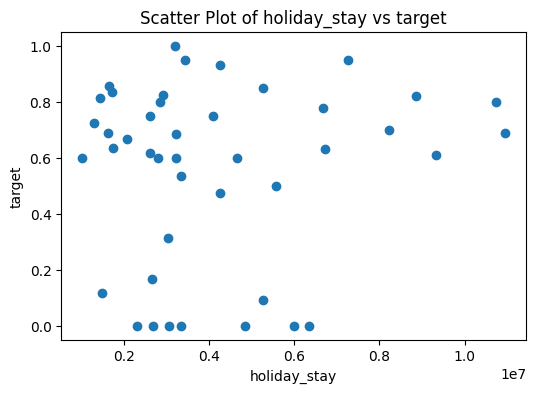

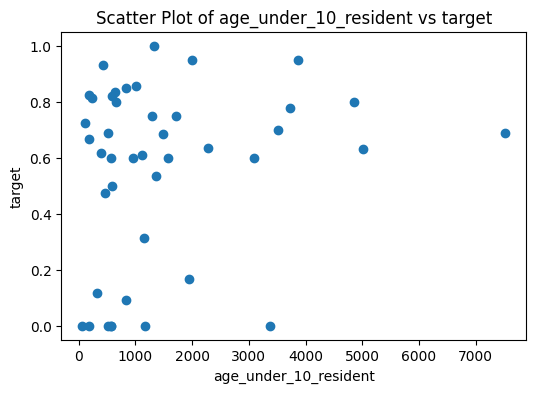

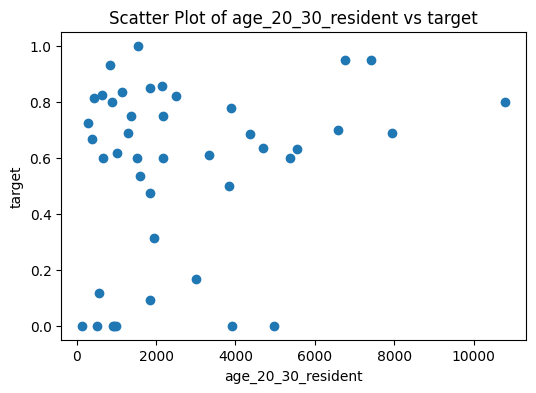

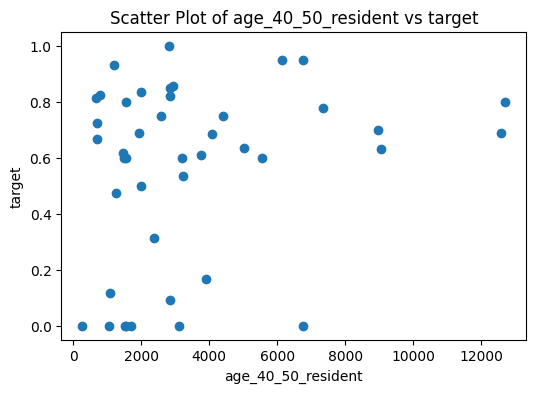

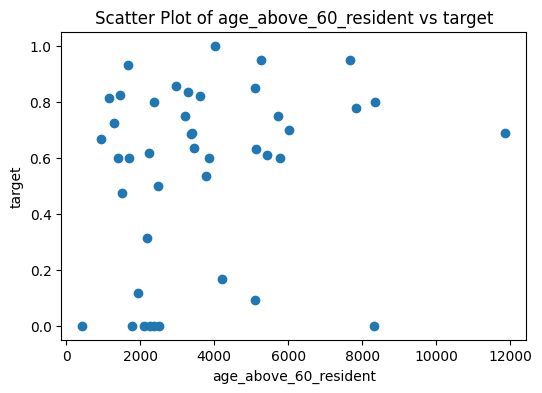

In [ ]:
# 'target'을 기준으로 나머지 변수들과의 산점도를 그리기
target_variable = 'target'

# 나머지 변수들에 대한 산점도를 반복적으로 그리기
for column in df.columns:
    if column != target_variable:
        plt.figure(figsize=(6, 4))  # 각 산점도를 적당한 크기로 설정
        plt.scatter(df[column], df[target_variable])
        plt.xlabel(column)
        plt.ylabel(target_variable)
        plt.title(f'Scatter Plot of {column} vs {target_variable}')
        plt.show()

# 변수선택

In [ ]:
# 스피어만 상관계수 계산
spearman_corr = df.corr(method='spearman')

# 스피어만 상관계수 출력->절댓값기준 정렬
print(spearman_corr['target'].abs().sort_values(ascending=False))

target                   1.000000
bus                      0.247365
age_above_60_resident    0.231207
age_under_10_resident    0.179802
age_40_50_resident       0.173336
Blog_contents            0.164080
leisure_life_stay        0.163450
Cafe_contents            0.162888
age_above_60_stay        0.154971
age_20_30_resident       0.154289
convenient               0.134688
leisure_life_move        0.119843
daily_life_stay          0.113181
PC                       0.096936
age_under_10_stay        0.093421
daily_life_move          0.078810
holiday_move             0.075782
shop                     0.072075
weekday_stay             0.066016
Mobile                   0.047619
weekday_move             0.045348
age_40_50_move           0.043455
age_above_60_move        0.042320
age_40_50_stay           0.027633
holiday_stay             0.021803
age_20_30_stay           0.018851
age_under_10_move        0.017337
age_20_30_move           0.009085
car                      0.007900
Name: target, 

In [ ]:
# 의사결정트리 모델 생성 및 학습
dt = DecisionTreeRegressor(random_state=42)
dt.fit(df.drop(columns=['target']), df['target'])

# 변수 중요도 계산
importances = dt.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': df.drop(columns=['target']).columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 중요도가 높은 상위 n개의 변수 선택
n = 12  # 선택할 변수 개수
top_n_features = feature_importance_df['Feature'][:n]

print(f'상위 {n}개 변수: {list(top_n_features)}')

상위 12개 변수: ['bus', 'convenient', 'age_above_60_stay', 'shop', 'age_20_30_move', 'car', 'leisure_life_stay', 'holiday_stay', 'daily_life_stay', 'age_40_50_resident', 'leisure_life_move', 'age_above_60_resident']


In [ ]:
feature_importance_df

,Feature,Importance
1,bus,2.935339e-01
3,convenient,2.613183e-01
19,age_above_60_stay,1.774032e-01
2,shop,1.262352e-01
9,age_20_30_move,6.270205e-02
0,car,3.647979e-02
21,leisure_life_stay,1.339141e-02
23,holiday_stay,9.990364e-03
20,daily_life_stay,5.977803e-03
26,age_40_50_resident,4.909606e-03


In [ ]:
# 랜덤포레스트 모델 생성 및 학습
rf = RandomForestRegressor(random_state=42)
rf.fit(df.drop(columns=['target']), df['target'])

# 변수 중요도 계산
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': df.drop(columns=['target']).columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 중요도가 높은 상위 n개의 변수 선택
n = 12  # 선택할 변수 개수
top_n_features = feature_importance_df['Feature'][:n]

print(f'상위 {n}개 변수: {list(top_n_features)}')

상위 12개 변수: ['bus', 'convenient', 'shop', 'Blog_contents', 'age_above_60_resident', 'leisure_life_move', 'car', 'Cafe_contents', 'age_20_30_resident', 'age_20_30_move', 'age_40_50_move', 'age_above_60_move']


In [ ]:
feature_importance_df

,Feature,Importance
1,bus,0.257815
3,convenient,0.135806
2,shop,0.133502
6,Blog_contents,0.048811
27,age_above_60_resident,0.040475
13,leisure_life_move,0.037170
0,car,0.030894
7,Cafe_contents,0.030063
25,age_20_30_resident,0.029382
9,age_20_30_move,0.029112


In [ ]:
# XGBoost 모델 생성 및 학습
xgb = XGBRegressor(random_state=42)
xgb.fit(df.drop(columns=['target']), df['target'])

# 변수 중요도 계산
importances = xgb.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': df.drop(columns=['target']).columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 중요도가 높은 상위 n개의 변수 선택
n = 12  # 선택할 변수 개수
top_n_features = feature_importance_df['Feature'][:n]

print(f'상위 {n}개 변수: {list(top_n_features)}')

상위 12개 변수: ['age_under_10_resident', 'age_above_60_resident', 'age_40_50_resident', 'Cafe_contents', 'convenient', 'bus', 'age_20_30_move', 'Mobile', 'PC', 'Blog_contents', 'shop', 'leisure_life_move']


In [ ]:
feature_importance_df

,Feature,Importance
24,age_under_10_resident,0.218646
27,age_above_60_resident,0.125308
26,age_40_50_resident,0.116544
7,Cafe_contents,0.089676
3,convenient,0.082684
1,bus,0.081444
9,age_20_30_move,0.078210
5,Mobile,0.038471
4,PC,0.025229
6,Blog_contents,0.021621


In [ ]:
# 의사결정트리 모델 생성
model = DecisionTreeRegressor(random_state=42)

# 순방향 선택법 적용
sfs = SFS(model,
          k_features=12,  # 선택할 특성 수
          forward=True,  # 순방향 선택
          floating=False,  # 플로팅 여부 (변수 제거 후 다시 선택)
          scoring='neg_mean_absolute_error',  # 성능 기준 (R-squared)
          cv=0)  # 교차검증 비활성화

sfs = sfs.fit(df.drop(columns=['target']), df['target'])

# 선택된 특성 출력
print("Selected features:", sfs.k_feature_names_)

Selected features: ('car', 'bus', 'shop', 'convenient', 'PC', 'Mobile', 'Blog_contents', 'Cafe_contents', 'age_under_10_move', 'age_20_30_move', 'age_40_50_move', 'age_above_60_move')


In [ ]:
# 랜덤포레스트 모델로 변수 선택
model = RandomForestRegressor(random_state=42)

# 순방향 선택법 적용
sfs = SFS(model,
          k_features=12,  # 선택할 특성 수
          forward=True,  # 순방향 선택
          floating=False,  # 플로팅 여부 (변수 제거 후 다시 선택)
          scoring='neg_mean_absolute_error',  # 성능 기준 (R-squared)
          cv=0)  # 교차검증 비활성화

sfs = sfs.fit(df.drop(columns=['target']), df['target'])

# 선택된 특성 출력
print("Selected features:", sfs.k_feature_names_)

Selected features: ('bus', 'shop', 'PC', 'Mobile', 'age_under_10_move', 'age_20_30_move', 'age_40_50_move', 'age_above_60_move', 'daily_life_move', 'leisure_life_move', 'weekday_move', 'holiday_stay')


In [ ]:
# XGBoost 모델 선언
model = XGBRegressor(random_state=42)

# 순방향 선택법 적용
sfs = SFS(model,
          k_features=12,  # 선택할 특성 수
          forward=True,  # 순방향 선택
          floating=False,  # 플로팅 여부 (변수 제거 후 다시 선택)
          scoring='neg_mean_absolute_error',  # 성능 기준 (R-squared)
          cv=0)  # 교차검증 비활성화

sfs = sfs.fit(df.drop(columns=['target']), df['target'])

# 선택된 특성 출력
print("Selected features:", sfs.k_feature_names_)

Selected features: ('bus', 'shop', 'Mobile', 'age_20_30_move', 'age_above_60_move', 'weekday_move', 'age_under_10_stay', 'age_20_30_stay', 'age_above_60_stay', 'leisure_life_stay', 'age_under_10_resident', 'age_20_30_resident')


In [ ]:
# 의사결정트리 모델 생성
model = DecisionTreeRegressor(random_state=42)

# 후방향 제거법 적용
sfs = SFS(model,
          k_features=12,  # 선택할 특성 수
          forward=False,  # 순방향 선택
          floating=False,  # 플로팅 여부 (변수 제거 후 다시 선택)
          scoring='r2',  # 성능 기준 (R-squared)
          cv=0)  # 교차검증 비활성화

sfs = sfs.fit(df.drop(columns=['target']), df['target'])

# 선택된 특성 출력
print("Selected features:", sfs.k_feature_names_)

Selected features: ('car', 'bus', 'shop', 'convenient', 'PC', 'Mobile', 'Blog_contents', 'Cafe_contents', 'age_under_10_move', 'age_20_30_move', 'age_40_50_move', 'age_above_60_move')


In [ ]:
# 랜덤포레스트 모델로 변수 선택
model = RandomForestRegressor(random_state=42)

# 후방향 제거법 적용
sfs = SFS(model,
          k_features=12,  # 선택할 특성 수
          forward=False,  # 순방향 선택
          floating=False,  # 플로팅 여부 (변수 제거 후 다시 선택)
          scoring='r2',  # 성능 기준 (R-squared)
          cv=0)  # 교차검증 비활성화

sfs = sfs.fit(df.drop(columns=['target']), df['target'])

# 선택된 특성 출력
print("Selected features:", sfs.k_feature_names_)

Selected features: ('bus', 'convenient', 'age_20_30_move', 'age_40_50_move', 'daily_life_move', 'weekday_move', 'age_40_50_stay', 'daily_life_stay', 'leisure_life_stay', 'age_under_10_resident', 'age_40_50_resident', 'age_above_60_resident')


In [ ]:
# XGBoost 모델 선언
model = XGBRegressor(random_state=42)

# 후방향 제거법 적용
sfs = SFS(model,
          k_features=12,  # 선택할 특성 수
          forward=False,  # 순방향 선택
          floating=False,  # 플로팅 여부 (변수 제거 후 다시 선택)
          scoring='r2',  # 성능 기준 (R-squared)
          cv=0)  # 교차검증 비활성화

sfs = sfs.fit(df.drop(columns=['target']), df['target'])

# 선택된 특성 출력
print("Selected features:", sfs.k_feature_names_)

Selected features: ('bus', 'PC', 'Mobile', 'Cafe_contents', 'age_above_60_move', 'weekday_move', 'age_under_10_stay', 'age_above_60_stay', 'leisure_life_stay', 'age_under_10_resident', 'age_20_30_resident', 'age_above_60_resident')


In [ ]:
# 의사결정트리 모델 생성
model = DecisionTreeRegressor(random_state=42)

# Stepwise Selection
sfs = SFS(model,
          k_features=12,  # 선택할 특성 수
          forward=True,  # 순방향 선택
          floating=True,  # 플로팅 여부 (변수 제거 후 다시 선택)
          scoring='r2',  # 성능 기준 (R-squared)
          cv=0)  # 교차검증 비활성화

sfs = sfs.fit(df.drop(columns=['target']), df['target'])

# 선택된 특성 출력
print("Selected features:", sfs.k_feature_names_)

Selected features: ('car', 'bus', 'shop', 'convenient', 'PC', 'Mobile', 'Blog_contents', 'Cafe_contents', 'age_under_10_move', 'age_20_30_move', 'age_40_50_move', 'age_above_60_move')


In [ ]:
# 랜덤포레스트 모델로 변수 선택
model = RandomForestRegressor(random_state=42)

# Stepwise Selection
sfs = SFS(model,
          k_features=12,  # 선택할 특성 수
          forward=True,  # 순방향 선택
          floating=True,  # 플로팅 여부 (변수 제거 후 다시 선택)
          scoring='r2',  # 성능 기준 (R-squared)
          cv=0)  # 교차검증 비활성화

sfs = sfs.fit(df.drop(columns=['target']), df['target'])

# 선택된 특성 출력
print("Selected features:", sfs.k_feature_names_)


Selected features: ('car', 'bus', 'PC', 'Mobile', 'age_under_10_move', 'age_20_30_move', 'age_40_50_move', 'age_above_60_move', 'daily_life_move', 'leisure_life_move', 'weekday_move', 'holiday_move')


In [ ]:
# XGBoost 모델 선언
model = XGBRegressor(random_state=42)

# Stepwise Selection
sfs = SFS(model,
          k_features=12,  # 선택할 특성 수
          forward=True,  # 순방향 선택
          floating=True,  # 플로팅 여부 (변수 제거 후 다시 선택)
          scoring='r2',  # 성능 기준 (R-squared)
          cv=0)  # 교차검증 비활성화

sfs = sfs.fit(df.drop(columns=['target']), df['target'])

# 선택된 특성 출력
print("Selected features:", sfs.k_feature_names_)

Selected features: ('bus', 'shop', 'convenient', 'Mobile', 'Cafe_contents', 'age_above_60_move', 'daily_life_move', 'weekday_move', 'holiday_move', 'age_40_50_stay', 'holiday_stay', 'age_under_10_resident')


In [ ]:
spearman_corr=['bus','age_above_60_resident','age_under_10_resident','age_40_50_resident','Blog_contents','leisure_life_stay','Cafe_contents','age_above_60_stay','age_20_30_resident','convenient','leisure_life_move','daily_life_stay']
dt=['bus', 'convenient', 'age_above_60_stay', 'shop', 'age_20_30_move', 'car', 'leisure_life_stay', 'holiday_stay', 'daily_life_stay', 'age_40_50_resident', 'leisure_life_move', 'age_above_60_resident']
rf=['bus', 'convenient', 'shop', 'Blog_contents', 'age_above_60_resident', 'leisure_life_move', 'car', 'Cafe_contents', 'age_20_30_resident', 'age_20_30_move', 'age_40_50_move', 'age_above_60_move']
xgb=['age_under_10_resident', 'age_above_60_resident', 'age_40_50_resident', 'Cafe_contents', 'convenient', 'bus', 'age_20_30_move', 'Mobile', 'PC', 'Blog_contents', 'shop', 'leisure_life_move']
dt_for=['car', 'bus', 'shop', 'convenient', 'PC', 'Mobile', 'Blog_contents', 'Cafe_contents', 'age_under_10_move', 'age_20_30_move', 'age_40_50_move', 'age_above_60_move']
rf_for=['bus', 'shop', 'PC', 'Mobile', 'age_under_10_move', 'age_20_30_move', 'age_40_50_move', 'age_above_60_move', 'daily_life_move', 'leisure_life_move', 'weekday_move', 'holiday_stay']
xgb_for=['bus', 'shop', 'Mobile', 'age_20_30_move', 'age_above_60_move', 'weekday_move', 'age_under_10_stay', 'age_20_30_stay', 'age_above_60_stay', 'leisure_life_stay', 'age_under_10_resident', 'age_20_30_resident']
dt_back=['car', 'bus', 'shop', 'convenient', 'PC', 'Mobile', 'Blog_contents', 'Cafe_contents', 'age_under_10_move', 'age_20_30_move', 'age_40_50_move', 'age_above_60_move']
rf_back=['bus', 'convenient', 'age_20_30_move', 'age_40_50_move', 'daily_life_move', 'weekday_move', 'age_40_50_stay', 'daily_life_stay', 'leisure_life_stay', 'age_under_10_resident', 'age_40_50_resident', 'age_above_60_resident']
xgb_back=['bus', 'PC', 'Mobile', 'Cafe_contents', 'age_above_60_move', 'weekday_move', 'age_under_10_stay', 'age_above_60_stay', 'leisure_life_stay', 'age_under_10_resident', 'age_20_30_resident', 'age_above_60_resident']
dt_step=['car', 'bus', 'shop', 'convenient', 'PC', 'Mobile', 'Blog_contents', 'Cafe_contents', 'age_under_10_move', 'age_20_30_move', 'age_40_50_move', 'age_above_60_move']
rf_step=['car', 'bus', 'PC', 'Mobile', 'age_under_10_move', 'age_20_30_move', 'age_40_50_move', 'age_above_60_move', 'daily_life_move', 'leisure_life_move', 'weekday_move', 'holiday_move']
xgb_step=['bus', 'shop', 'convenient', 'Mobile', 'Cafe_contents', 'age_above_60_move', 'daily_life_move', 'weekday_move', 'holiday_move', 'age_40_50_stay', 'holiday_stay', 'age_under_10_resident']


In [ ]:
# corr + feature_importance + stepwise -> best 조합
all_elements = spearman_corr + dt + rf+ xgb + dt_step + rf_step + xgb_step
counted_elements = Counter(all_elements)
sorted_elements = counted_elements.most_common()
for element, count in sorted_elements:
    print(f"{element}: {count}")

bus: 7
convenient: 6
Cafe_contents: 5
leisure_life_move: 5
shop: 5
age_20_30_move: 5
age_above_60_resident: 4
Blog_contents: 4
car: 4
age_above_60_move: 4
Mobile: 4
age_under_10_resident: 3
age_40_50_resident: 3
age_40_50_move: 3
PC: 3
leisure_life_stay: 2
age_above_60_stay: 2
age_20_30_resident: 2
daily_life_stay: 2
holiday_stay: 2
age_under_10_move: 2
daily_life_move: 2
weekday_move: 2
holiday_move: 2
age_40_50_stay: 1


# 모델

In [63]:
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/빅콘/data/통합.csv',encoding='cp949')
df2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/빅콘/data/부산시장_최종.csv')

In [64]:
df1=df1.drop(['행정동코드', '시도명', '시군구명', '읍면동명', '시장명', '위도', '경도'], axis=1)
new_columns=['car', 'bus', 'shop', 'convenient', 'PC', 'Mobile', 'Blog_contents', 'Cafe_contents',
             'age_under_10_move', 'age_20_30_move', 'age_40_50_move', 'age_above_60_move',
             'daily_life_move', 'leisure_life_move', 'weekday_move', 'holiday_move',
             'age_under_10_stay', 'age_20_30_stay', 'age_40_50_stay', 'age_above_60_stay',
             'daily_life_stay', 'leisure_life_stay', 'weekday_stay', 'holiday_stay',
             'age_under_10_resident', 'age_20_30_resident', 'age_40_50_resident', 'age_above_60_resident',
             'target']
df1.columns = new_columns

In [65]:
df1=df1[df1['target']!=0]

In [ ]:
# 위 best 조합에서 리스트 속한 값 5개까지 선택
num4 = ['bus','convenient','Cafe_contents','leisure_life_move','shop','age_20_30_move','target']

In [ ]:
data=df1[num4]
X = data.drop(columns=['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
nmae = mae / np.mean(y_test)

print('mse :', mse)
print('rmse :', rmse)
print('r2 :',r2)
print('mae :', mae)
print('nmae :', nmae)

mse : 0.05731649999999999
rmse : 0.2394086464603983
r2 : -0.23373429141743407
mae : 0.18624999999999997
nmae : 0.28937657797630606


In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
nmae = mae / np.mean(y_test)

print('mse :', mse)
print('rmse :', rmse)
print('r2 :',r2)
print('mae :', mae)
print('nmae :', nmae)

mse : 0.03546385247500006
rmse : 0.18831848681157157
r2 : 0.2366426612899144
mae : 0.13626500000000025
nmae : 0.2117148960963298


In [ ]:
# 최종 모델
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
nmae = mae / np.mean(y_test)

print('mse :', mse)
print('rmse :', rmse)
print('r2 :',r2)
print('mae :', mae)
print('nmae :', nmae)

mse : 0.03488924696251562
rmse : 0.1867866348605157
r2 : 0.2490110111505922
mae : 0.1565001218020916
nmae : 0.24315419973135233


# 부산

In [49]:
df2=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/빅콘/data/부산시장_최종.csv')
df2['시장명']

,시장명
0,부산평화시장
1,동래시장
2,부산진시장
3,사상시장
4,서동향토시장
5,초량전통시장
6,서면종합시장
7,사직시장
8,부산전자종합시장


In [50]:
df2=df2.drop(['행정동코드', '시도명', '시군구명', '읍면동명', '시장명', '도로명주소', '지번주소'], axis=1)
df2.columns

Index(['점포수(a+b 임시로 작성)', '편의시설수', 'PC검색량', 'Mobile검색량', '블로그콘텐츠', '카페콘텐츠',
       '주차장', '버스정류장 수', 'age_under_10_유동', 'age_20_30_유동', 'age_40_50_유동',
       'age_above_60_유동', 'daily_life_유동', 'leisure_life_유동', 'weekday_유동',
       'holiday_유동', 'age_under_10_체류', 'age_20_30_체류', 'age_40_50_체류',
       'age_above_60_체류', 'daily_life_체류', 'leisure_life_체류', 'weekday_체류',
       'holiday_체류', 'age_under_10_주민등록', 'age_20_30_주민등록', 'age_40_50_주민등록',
       'age_above_60_주민등록'],
      dtype='object')

In [51]:
new_columns=['shop', 'convenient', 'PC', 'Mobile', 'Blog_contents', 'Cafe_contents', 'car', 'bus',
             'age_under_10_move', 'age_20_30_move', 'age_40_50_move', 'age_above_60_move',
             'daily_life_move', 'leisure_life_move', 'weekday_move', 'holiday_move',
             'age_under_10_stay', 'age_20_30_stay', 'age_40_50_stay', 'age_above_60_stay',
             'daily_life_stay', 'leisure_life_stay', 'weekday_stay', 'holiday_stay',
             'age_under_10_resident', 'age_20_30_resident', 'age_40_50_resident', 'age_above_60_resident']

In [52]:
df2.columns = new_columns

In [53]:
num4 = ['bus','convenient','Cafe_contents','leisure_life_move','shop','age_20_30_move','target']
num4_test = ['bus','convenient','Cafe_contents','leisure_life_move','shop','age_20_30_move']

In [54]:
data=df1[num4]
X = data.drop(columns=['target'])
y = data['target']
test=df2[num4_test]

model = XGBRegressor(random_state=42)
model.fit(X, y)
y_pred = model.predict(test)

y_pred

array([0.09273431, 0.09265748, 0.09218543, 0.3041003 , 0.1557431 ,
       0.7638041 , 0.09185631, 0.07405426, 0.09242234], dtype=float32)

# 영업률 0인 시장

In [57]:
df3=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/빅콘/data/통합.csv',encoding='cp949')
df3=df3.drop(['행정동코드', '시도명', '시군구명', '읍면동명', '시장명', '위도', '경도'], axis=1)
new_columns=['car', 'bus', 'shop', 'convenient', 'PC', 'Mobile', 'Blog_contents', 'Cafe_contents',
             'age_under_10_move', 'age_20_30_move', 'age_40_50_move', 'age_above_60_move',
             'daily_life_move', 'leisure_life_move', 'weekday_move', 'holiday_move',
             'age_under_10_stay', 'age_20_30_stay', 'age_40_50_stay', 'age_above_60_stay',
             'daily_life_stay', 'leisure_life_stay', 'weekday_stay', 'holiday_stay',
             'age_under_10_resident', 'age_20_30_resident', 'age_40_50_resident', 'age_above_60_resident',
             'target']
df3.columns = new_columns

In [58]:
df3=df3[df3['target']==0]

In [59]:
df3

,car,bus,shop,convenient,PC,Mobile,Blog_contents,Cafe_contents,age_under_10_move,age_20_30_move,...,age_above_60_stay,daily_life_stay,leisure_life_stay,weekday_stay,holiday_stay,age_under_10_resident,age_20_30_resident,age_40_50_resident,age_above_60_resident,target
36,8,40,800,22,4540,42600,4930,5000,134084,179174,...,1169832,2054438,2582626,2321119,2315945,65,145,271,439,0.0
37,1,36,230,14,300,2860,365,369,111271,128457,...,1567435,7361763,6279679,7650807,5990635,1166,4961,3107,2262,0.0
38,31,24,134,16,10,10,6,6,101330,296653,...,1663862,4849031,3052094,4559481,3341644,518,909,1518,1772,0.0
39,10,14,151,10,10,10,142,147,337349,540515,...,3301194,8300687,4727442,8171359,4856770,178,521,1062,2102,0.0
40,1,17,121,9,50,420,8180,8710,142392,147252,...,3621870,10760100,4020942,8435708,6345334,3376,3909,6751,8320,0.0
41,13,14,683,18,620,5210,440,440,79207,53419,...,1988891,5537129,2105274,4576423,3065980,566,986,1549,2366,0.0
42,1,8,257,23,60,410,200,210,92346,89890,...,1294381,3297485,2060989,2674377,2684097,570,947,1713,2520,0.0


In [61]:
df3=df3.drop('target', axis=1)
df3

,car,bus,shop,convenient,PC,Mobile,Blog_contents,Cafe_contents,age_under_10_move,age_20_30_move,...,age_40_50_stay,age_above_60_stay,daily_life_stay,leisure_life_stay,weekday_stay,holiday_stay,age_under_10_resident,age_20_30_resident,age_40_50_resident,age_above_60_resident
36,8,40,800,22,4540,42600,4930,5000,134084,179174,...,1729612,1169832,2054438,2582626,2321119,2315945,65,145,271,439
37,1,36,230,14,300,2860,365,369,111271,128457,...,4297017,1567435,7361763,6279679,7650807,5990635,1166,4961,3107,2262
38,31,24,134,16,10,10,6,6,101330,296653,...,2870945,1663862,4849031,3052094,4559481,3341644,518,909,1518,1772
39,10,14,151,10,10,10,142,147,337349,540515,...,4824591,3301194,8300687,4727442,8171359,4856770,178,521,1062,2102
40,1,17,121,9,50,420,8180,8710,142392,147252,...,4786414,3621870,10760100,4020942,8435708,6345334,3376,3909,6751,8320
41,13,14,683,18,620,5210,440,440,79207,53419,...,2803517,1988891,5537129,2105274,4576423,3065980,566,986,1549,2366
42,1,8,257,23,60,410,200,210,92346,89890,...,2106151,1294381,3297485,2060989,2674377,2684097,570,947,1713,2520


In [66]:
num4 = ['bus','convenient','Cafe_contents','leisure_life_move','shop','age_20_30_move','target']
num4_test = ['bus','convenient','Cafe_contents','leisure_life_move','shop','age_20_30_move']

In [67]:
data=df1[num4]
X = data.drop(columns=['target'])
y = data['target']
test=df3[num4_test]

model = XGBRegressor(random_state=42)
model.fit(X, y)
y_pred = model.predict(test)

y_pred

array([0.09287035, 0.09209145, 0.70327765, 0.5487963 , 0.25882608,
       0.7743977 , 0.8046896 ], dtype=float32)

In [70]:
df5=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/빅콘/data/통합.csv',encoding='cp949')
df5.tail(7)

,행정동코드,시도명,시군구명,읍면동명,시장명,주차장수,위도,경도,버스정류장수,점포수,...,age_above_60_체류,daily_life_체류,leisure_life_체류,weekday_체류,holiday_체류,age_under_10_주민등록,age_20_30_주민등록,age_40_50_주민등록,age_above_60_주민등록,영업률
36,2611057000,부산광역시,중구,광복동,국제시장,8,35.101110,129.028106,40,800,...,1169832,2054438,2582626,2321119,2315945,65,145,271,439,0.0
37,2623052000,부산광역시,부산진구,부전제2동,서면시장,1,35.155625,129.058141,36,230,...,1567435,7361763,6279679,7650807,5990635,1166,4961,3107,2262,0.0
38,2811053000,인천광역시,중구,신포동,신포눈꽃마을,31,37.470621,126.626611,24,134,...,1663862,4849031,3052094,4559481,3341644,518,909,1518,1772,0.0
39,3011051500,대전광역시,동구,중앙동,중앙메가프라자,10,36.326729,127.433958,14,151,...,3301194,8300687,4727442,8171359,4856770,178,521,1062,2102,0.0
40,2871025000,인천광역시,강화군,강화읍,강화중앙시장,1,37.747715,126.483142,17,121,...,3621870,10760100,4020942,8435708,6345334,3376,3909,6751,8320,0.0
41,4315052800,충청북도,제천시,중앙동,제천중앙시장,13,37.136650,128.211326,14,683,...,1988891,5537129,2105274,4576423,3065980,566,986,1549,2366,0.0
42,5121054000,강원특별자치도,속초시,금호동,속초중앙재래시장,1,38.202480,128.592193,8,257,...,1294381,3297485,2060989,2674377,2684097,570,947,1713,2520,0.0
